In [1]:
import pandas as pd
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
images_list=sorted(glob("./processed_data/Nov_21/4/*.png"))
camera_data_clean=[x.split("/")[-1].split(".")[0] for x in images_list]
camera_data_clean=[x.split("_")[0]+"."+x.split("_")[1] for x in camera_data_clean]
camera_timestamps=np.array(camera_data_clean,np.float128)

In [32]:
camera_tared=camera_timestamps-camera_timestamps[0]

In [33]:
camera_tared

array([  0.       ,   1.7884989,   2.8343706,   3.9330997,   4.7849226,
         5.806261 ,   6.8193264,   7.8514175,   8.7963667,   9.751997 ,
        10.8271227,  11.8162746,  12.8059988,  13.8179912,  14.8255253,
        15.783349 ,  16.8401642,  17.8303413,  18.8338938,  19.9229669,
        20.8152494,  21.8091698,  22.8026371,  23.8557329,  24.8286009,
        25.8034954,  26.8796701,  27.8388052,  28.8202085,  29.9689817,
        30.8382568,  31.834013 ,  32.8100042,  33.8114347,  34.8856306,
        35.8769998,  36.8433828,  37.7785568,  38.7896671,  39.808979 ,
        40.9014139,  41.825716 ,  42.8902559,  43.8980999,  44.7696161,
        46.0358105,  46.8456716,  47.7543335,  48.7534752,  49.7756719,
        50.7560024,  51.777317 ,  52.7901678,  53.8121977,  54.7871399,
        55.8397827,  56.7622251,  57.7930527,  58.8478412,  59.8716116,
        60.9046325,  61.7978926,  62.7848034,  63.8075723,  64.7843981,
        65.843812 ,  66.9036073,  67.9399185,  68.8369932,  69.7

In [128]:
df=pd.read_csv("./processed_data/Nov_21/4/dataset4_2023_12_13_11_07_30_sync.csv")

In [129]:
times=np.array(df["Timestamp"]-df["Timestamp"][0],np.float128)

In [130]:
times_tared=times/np.power(10,9)

In [131]:
times_tared

array([ 0.        ,  0.76576471,  1.51677728,  2.29491186,  3.02597451,
        3.77150726,  4.50991011,  5.26338577,  6.02087402,  6.78216648,
        7.57320142,  8.30777049,  9.02348256,  9.79481363, 10.53709245,
       11.3095634 , 12.08577132, 12.77573919, 13.52163005, 14.2459836 ,
       14.99951816, 15.75596023, 16.54480362, 17.29075813, 18.03428555,
       18.77555728, 19.49632883, 20.27250409, 20.98548603, 21.77313328,
       22.50685763, 23.24311423, 23.98439336, 24.6901629 , 25.53720713,
       26.31478906, 27.04151702, 27.78893614, 28.59464168, 29.3868494 ,
       30.14036131, 30.88492823, 31.62731814, 32.40927505, 33.18707871,
       33.91732287, 34.62134337, 35.34805012, 36.09427524, 36.82116556,
       37.59445763, 38.33677769, 39.13684797, 39.83978581, 40.56913543,
       41.30119252, 42.04316402, 42.76440191, 43.50486207, 44.26867294,
       44.99469376, 45.71467018, 46.47607732, 47.19549894, 47.90559244,
       48.59425569, 49.37644219, 50.12788773, 50.91969919, 51.63

In [132]:
lst=[]
for x in camera_tared:
    lst.append(np.argmin(np.abs(times_tared-x)))

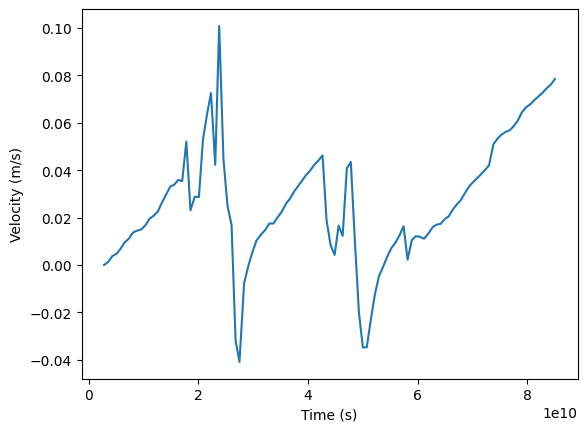

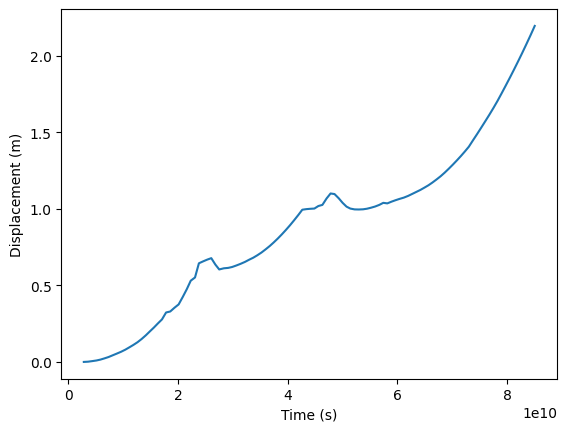

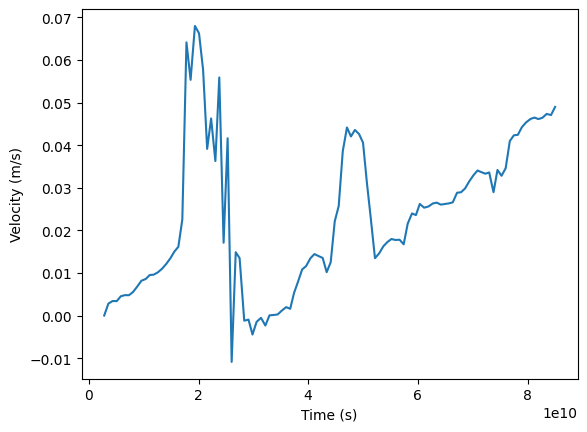

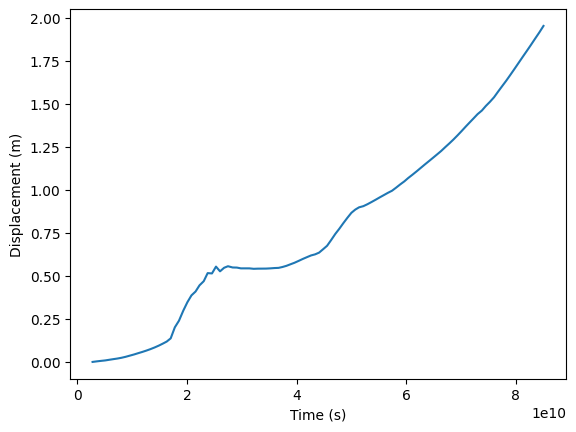

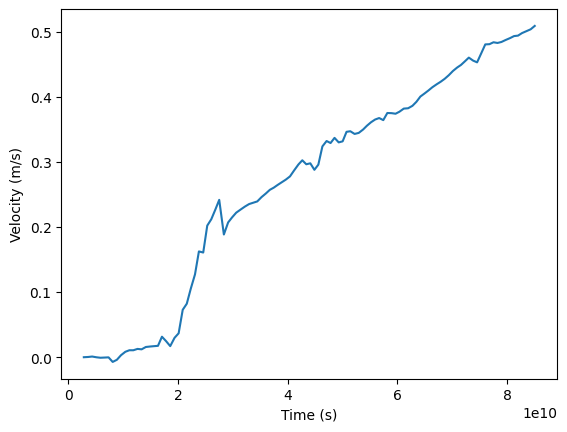

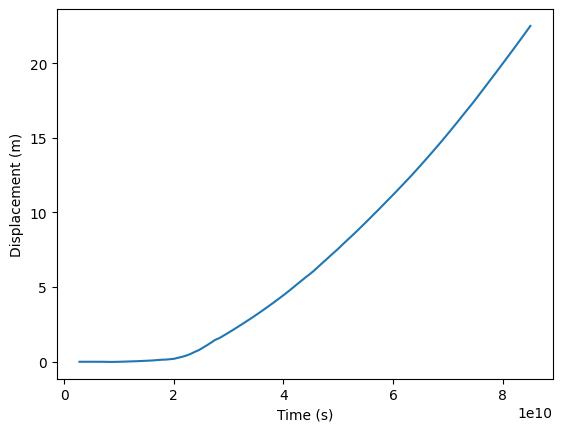

In [134]:
def create_v_d(accs,imus):
    vels=[]
    prev_time=imus.iloc[0]["Timestamp"]/np.power(10,9)
    bias=imus.iloc[0][accs]
    prev_acc=0
    prev_vel=0
    for x in imus.iloc:
    
            #Avg acc * dt = dv
        vel_d=0.5*(prev_acc+x[accs]-bias)*(x["Timestamp"]/np.power(10,9)-prev_time)
        vel=prev_vel+vel_d
        prev_vel=vel
        prev_time=x["Timestamp"]/np.power(10,9)
        vels.append(vel)
    plt.figure()
    plt.ylabel("Velocity (m/s)")
    plt.xlabel("Time (s)")
    plt.plot(imus.iloc[:]["Timestamp"],vels)
    i=0
    prev_s=0
    prev_time=imus.iloc[0]["Timestamp"]/np.power(10,9)
    dists=[]
    for x in imus.iloc:
    
            #Avg acc * dt = dv
        s=prev_s+vels[i]*(x["Timestamp"]/np.power(10,9)-prev_time)+0.5*0.5*(prev_acc+x[accs]-bias)*np.square(x["Timestamp"]/np.power(10,9)-prev_time)
        prev_s=s
        prev_vel=vel
        prev_time=x["Timestamp"]/np.power(10,9)
        dists.append(s)
        i+=1
    plt.figure()
    plt.ylabel("Displacement (m)")
    plt.xlabel("Time (s)")
    plt.plot(imus.iloc[:]["Timestamp"],dists)
    return vels,dists
z_v,z_d=create_v_d("IMU_Linear_Acc_Z",df)
y_v,y_d=create_v_d("IMU_Linear_Acc_Y",df)
x_v,x_d=create_v_d("IMU_Linear_Acc_X",df)

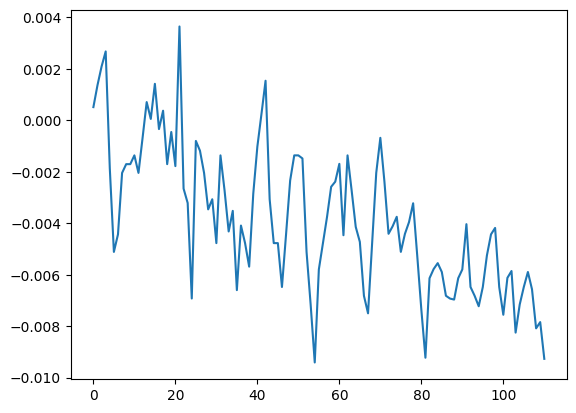

In [189]:
plt.plot(df.iloc[:]["Pose_Y"])

In [173]:
l2=[]
for x in range(0,len(z_d)):
    for y in range(x+1,len(z_d)):
        if(z_d[y]-z_d[x]>0.25):
            l2.append((x,y))
            break
compare=l2[0]
l3=[compare]
l4=[compare[0]]
for x in l2[1:]:
    if(compare[1]==x[0]):
        compare=x
        l3.append(x)
        l4.append(x[0])
        #l4.append(x[1])
    
l4

[0, 18, 26, 46, 59, 91, 98, 104]

106
./processed_data/Nov_21/4/1700535756_2575159.png
./processed_data/Nov_21/4/1700535764_3032922.png
./processed_data/Nov_21/4/1700535784_2692937.png
./processed_data/Nov_21/4/1700535797_2952337.png
./processed_data/Nov_21/4/1700535829_2217292.png
./processed_data/Nov_21/4/1700535836_2377986.png


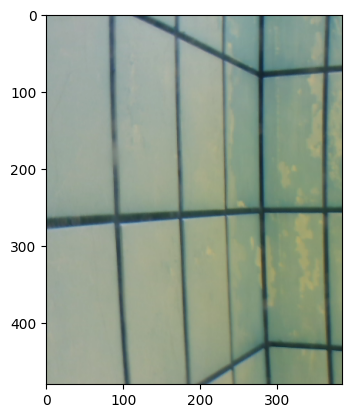

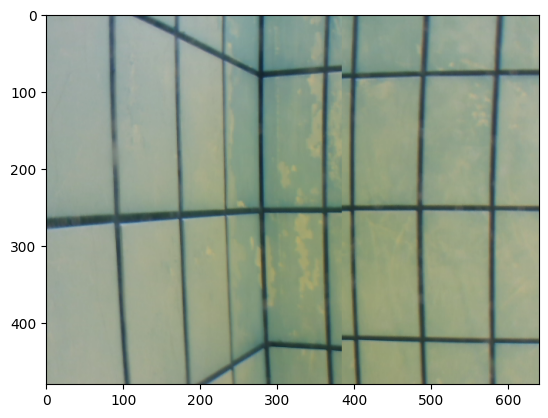

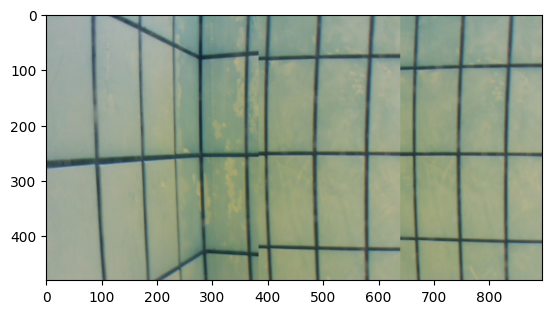

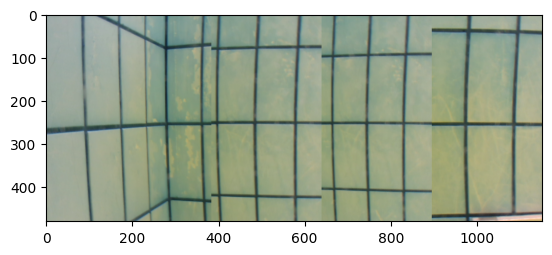

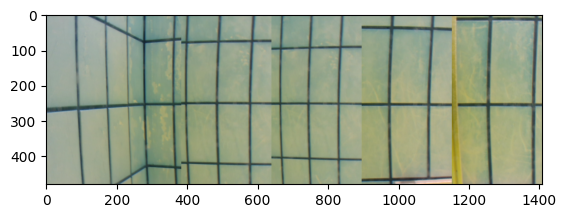

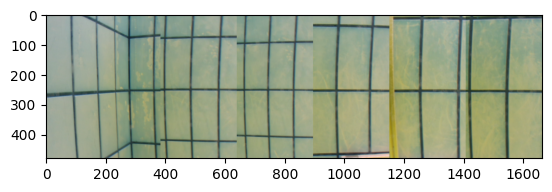

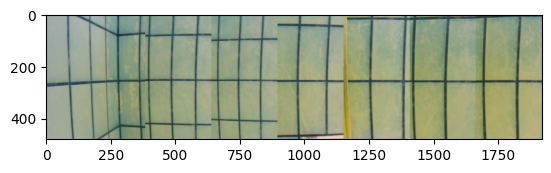

In [188]:
print(len(images_list))
img=cv2.imread(images_list[0])
img_first=img[:,:int(640*0.60)]
plt.figure()
plt.imshow(img_first)
for x in l4[1:len(l4)-1]:
    print(images_list[x])
    img=cv2.imread(images_list[x])
    img=img[:,int(640*0.60):]
    plt.figure()
    img_first=np.hstack([img_first,img])
    plt.imshow(img_first)
#img_last=cv2.imread(images_list[-1])
#img_last=cv2.imread(images_list[-1])
#plt.imshow(img_last[:,640//4:])   
#img_first=np.hstack(img_first,img_last) 

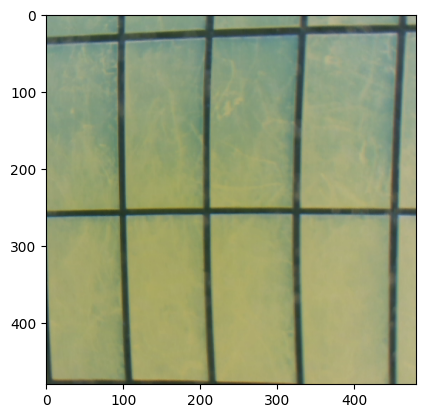

In [181]:
img_last=cv2.imread(images_list[-1])
plt.imshow(img_last[:,640//4:])
#print(img_last[:,:500])

In [151]:
camera_timestamps

array([1.70053574e+09, 1.70053574e+09, 1.70053574e+09, 1.70053574e+09,
       1.70053574e+09, 1.70053574e+09, 1.70053574e+09, 1.70053575e+09,
       1.70053575e+09, 1.70053575e+09, 1.70053575e+09, 1.70053575e+09,
       1.70053575e+09, 1.70053575e+09, 1.70053575e+09, 1.70053575e+09,
       1.70053575e+09, 1.70053576e+09, 1.70053576e+09, 1.70053576e+09,
       1.70053576e+09, 1.70053576e+09, 1.70053576e+09, 1.70053576e+09,
       1.70053576e+09, 1.70053576e+09, 1.70053576e+09, 1.70053577e+09,
       1.70053577e+09, 1.70053577e+09, 1.70053577e+09, 1.70053577e+09,
       1.70053577e+09, 1.70053577e+09, 1.70053577e+09, 1.70053577e+09,
       1.70053577e+09, 1.70053578e+09, 1.70053578e+09, 1.70053578e+09,
       1.70053578e+09, 1.70053578e+09, 1.70053578e+09, 1.70053578e+09,
       1.70053578e+09, 1.70053578e+09, 1.70053578e+09, 1.70053579e+09,
       1.70053579e+09, 1.70053579e+09, 1.70053579e+09, 1.70053579e+09,
       1.70053579e+09, 1.70053579e+09, 1.70053579e+09, 1.70053579e+09,
      

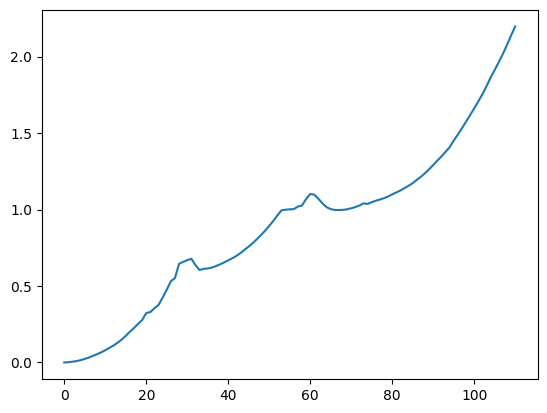

In [137]:
plt.plot(z_d)

In [87]:
l2=[]
for i in range(len(df)):
    l3=[]
    for j in range(i,len(df)):
        if(df.iloc[j]["Pose_Z"]-df.iloc[i]["Pose_Z"]>1):
            l3.append(j)
    if(len(l3)!=0):
        l2.append((i,l3[len(l3)//2]))

In [117]:
a=np.array(df.iloc[:]["Pose_Z"][:99])
c=np.unique(a)
c

array([-5.91416434e-04, -4.77743553e-04, -3.69961341e-04, -2.66794502e-05,
       -8.52871324e-12, -1.43327642e-12, -7.15769397e-13, -5.96490495e-13,
       -1.05190955e-14,  1.36573528e-12,  1.54371690e-12,  2.07993506e-12,
        2.74376235e-12,  4.39796841e-12,  6.70508315e-12,  1.35693866e-11,
        8.56274444e-08,  3.38241127e-05,  3.68642686e-05,  3.81949369e-05,
        4.03782821e-05,  4.18102371e-05,  4.93207762e-05,  5.63028837e-05,
        6.98304112e-05,  1.54583879e-04,  3.49602581e-04,  6.66666652e-01,
        9.99080551e-01,  9.99743674e-01,  9.99748807e-01,  9.99750644e-01,
        9.99786625e-01,  9.99884676e-01,  9.99974303e-01,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  

In [103]:
t_vec_2d = np.array([np.array([df.iloc[i]["Pose_Z"],df.iloc[i]["Pose_Y"],1]) for i in lst])
K=np.array([[645,0,640],[0,645,360],[0,0,1]])
(K@t_vec_2d.T).T

array([[ 6.40000000e+02,  3.60329858e+02,  1.00000000e+00],
       [ 6.40024636e+02,  3.61348657e+02,  1.00000000e+00],
       [ 6.40021817e+02,  3.58798750e+02,  1.00000000e+00],
       [ 6.40000000e+02,  3.56701534e+02,  1.00000000e+00],
       [ 6.40000000e+02,  3.57141345e+02,  1.00000000e+00],
       [ 6.40000000e+02,  3.58900513e+02,  1.00000000e+00],
       [ 6.40000000e+02,  3.58900512e+02,  1.00000000e+00],
       [ 6.40000000e+02,  3.59120417e+02,  1.00000000e+00],
       [ 6.40000000e+02,  3.59560188e+02,  1.00000000e+00],
       [ 6.40031812e+02,  3.60456535e+02,  1.00000000e+00],
       [ 6.40000055e+02,  3.60033327e+02,  1.00000000e+00],
       [ 6.40000000e+02,  3.59780094e+02,  1.00000000e+00],
       [ 6.40026044e+02,  3.60239381e+02,  1.00000000e+00],
       [ 6.40000000e+02,  3.58900510e+02,  1.00000000e+00],
       [ 6.39618536e+02,  3.58851337e+02,  1.00000000e+00],
       [ 6.39761375e+02,  3.62350590e+02,  1.00000000e+00],
       [ 6.39982792e+02,  3.58287344e+02

In [10]:
rotation_matrices = [np.eye(3)] * len(lst)  # Assuming the same rotation matrix for all images
translation_vectors = [np.array([df.iloc[i]["Pose_X"],df.iloc[i]["Pose_Y"],df.iloc[i]["Pose_Z"]]) for i in lst]  # Replace with actual translation vectors

def construct_extrinsic_matrix(rotation_matrix, translation_vector):
    extrinsic_matrix = np.hstack((rotation_matrix, translation_vector.reshape(-1, 1)))
    extrinsic_matrix = np.vstack((extrinsic_matrix, [0, 0, 0, 1]))
    return extrinsic_matrix

def align_images(images, extrinsic_matrices):
    aligned_images = []
    reference_matrix = np.eye(4)

    for i in range(len(images)):
        print("in")
        # Compute the relative transformation between the current image and the reference image
        relative_matrix = np.linalg.inv(extrinsic_matrices[i]) @ reference_matrix
        print(relative_matrix[:3, :])

        # Apply the relative transformation to the current image
        aligned_image = cv2.warpPerspective(images[i], relative_matrix[:3, :], (images[i].shape[1], images[i].shape[0]))

        aligned_images.append(aligned_image)

    return aligned_images

def stitch_images(images):
    # Create a stitcher object
    stitcher = cv2.Stitcher_create()

    # Set registration parameters if needed
    #stitcher.setRegistrationResol(0.6)
    #stitcher.setWaveCorrection(False)
    #stitcher.setFeaturesMatcher(cv2.detail_BestOf2NearestMatcher_create(False, 0.6))

    # Extract extrinsic matrices for each image
    extrinsic_matrices = [construct_extrinsic_matrix(rotation_matrix, translation_vector)
                          for rotation_matrix, translation_vector in zip(rotation_matrices, translation_vectors)]

    # Align images using extrinsic matrices
    aligned_images = align_images(images, extrinsic_matrices)

    # Stitch aligned images
    status, panorama = stitcher.stitch(aligned_images)

    if status == cv2.Stitcher_OK:
        plt.imshow("Panorama", panorama)
    else:
        print("Stitching failed")

# Example usage:
# Assume you have the following lists for each image



In [67]:


# Load images
images = [cv2.imread(img_path) for img_path in images_list]

# Stitch images
stitch_images(images)

in
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 1.49997058e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 1.02275409e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.12533375e-12]]


error: OpenCV(4.2.0) ../modules/imgproc/src/imgwarp.cpp:3167: error: (-215:Assertion failed) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 3 && M0.cols == 3 in function 'warpPerspective'


In [59]:
images

[array([[[145, 151, 127],
         [145, 151, 127],
         [145, 152, 126],
         ...,
         [146, 166, 149],
         [144, 166, 149],
         [144, 166, 149]],
 
        [[144, 151, 123],
         [145, 153, 124],
         [144, 148, 122],
         ...,
         [146, 166, 147],
         [144, 166, 149],
         [144, 166, 149]],
 
        [[132, 138, 107],
         [134, 140, 110],
         [138, 144, 113],
         ...,
         [146, 166, 147],
         [144, 166, 149],
         [144, 166, 149]],
 
        ...,
 
        [[159, 157, 121],
         [159, 157, 121],
         [156, 156, 122],
         ...,
         [158, 165, 130],
         [159, 166, 131],
         [158, 165, 130]],
 
        [[157, 158, 121],
         [157, 158, 121],
         [157, 157, 123],
         ...,
         [158, 165, 130],
         [159, 166, 131],
         [158, 165, 130]],
 
        [[160, 158, 122],
         [160, 158, 122],
         [158, 157, 125],
         ...,
         [160, 165, 130],
  